In [82]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [83]:
import numpy as np
import pandas as pd

In [84]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [86]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [87]:
# reflect an existing database into a new model
b = automap_base()

# reflect the tables
b.prepare(engine, reflect = True)

In [88]:
# We can view all of the classes that automap found
b.classes.keys()

['measurement', 'station']

In [89]:
# Save references to each table
# M = Measurement S = Station
m = b.classes.measurement
s = b.classes.station

In [90]:
# Create our session (link) from Python to the DB
se = Session(engine)

In [91]:
from sqlalchemy import inspect
i = inspect(engine)
i.get_table_names()
c = i.get_columns('Measurement')
for c in c:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [92]:
#cs = columns station
cs = i.get_columns('Station')
for c in cs:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

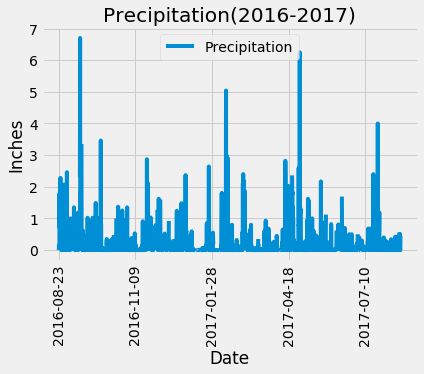

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

se.query(m.date).order_by(m.date.desc())
lDate = se.query(m.date).order_by(m.date.desc()).first()
lDate = lDate[0]

# Calculate the date 1 year ago from the last data point in the database
oYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
oYear

# # Perform a query to retrieve the data and precipitation scores
qOneYear = se.query(m.date,m.prcp).filter(m.date >= oYear).order_by(m.date).all()
qOneYear

# Save the query results as a Pandas DataFrame and set the index to the date column
precipDf = pd.DataFrame(qOneYear, columns = ['Date', 'Precipitation'])
precipDf = precipDf.set_index('Date')

# Sort the dataframe by date
precipDf = precipDf.sort_values(by = "Date", ascending = True)
precipDf

# Use Pandas Plotting with Matplotlib to plot the data
precipDf.plot(title="Precipitation(2016-2017)", rot = 90)
plt.legend(loc="upper center")
plt.ylabel("Inches")
plt.savefig("Images/Precipitation.png")

In [94]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipDf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [95]:
# Design a query to show how many stations are available in this dataset?
se.query(m.station).distinct().count()

9

In [96]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sActive = se.query(m.station, func.count(m.station)).group_by(m.station).order_by(func.count(m.station).desc()).all()
sActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
mActive = sActive[0][0]
total = se.query(func.min(m.tobs), func.max(m.tobs), func.avg(m.tobs)).filter(m.station == 'USC00519281').all()
total

[(54.0, 85.0, 71.66378066378067)]

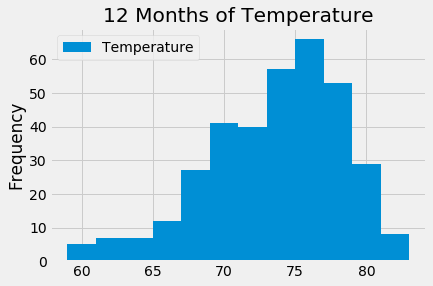

In [100]:
# Choose the station with the highest number of temperature observations


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
oYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
pYear = se.query(m.tobs).filter(m.date >= oYear).filter(m.station == mActive).all()

tempDf = pd.DataFrame(pYear, columns = ['Temperature'])

tempDf.plot.hist(bins = 12, title = '12 Months of Temperature')
plt.savefig('Images/temperature.png')
plt.show()

## Bonus Challenge Assignment

In [103]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return se.query(func.min(m.tobs), func.avg(m.tobs), func.max(m.tobs)).\
        filter(m.date >= start_date).filter(m.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [110]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
oneYeardata_start = dt.date(2015, 7, 7) - dt.timedelta(days = 365)
oneYeardata_end = dt.date(2016, 7, 7) - dt.timedelta(days = 365)
oneYeardata_start.strftime("%Y-%m-%d")
print(calc_temps(oneYeardata_start, oneYeardata_end))

[(56.0, 73.23177496038035, 85.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
